In [10]:
#Importation des packages 
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np 
#Cette data base contient "Cifar10"des 
#ensembles des images differents des objets 32*32 
from tensorflow.keras.datasets import cifar10 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# le modele sequentielle !!!!!
# le chrgement de la base de données 
(X_train,y_train),(X_test,y_test)= cifar10.load_data()

170508288/170498071 [==============================] - 97s 1us/step


In [ ]:
X_train[3] 

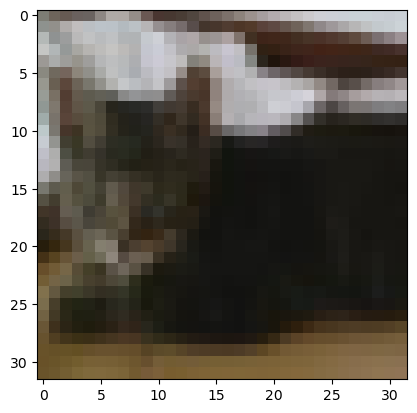

In [14]:
plt.imshow(X_train[9])

In [15]:
#il faut de normaliser les images 
X_train= X_train/255.0
X_test= X_test/255.0
#par ce que 255 est la plus grande valer qui se trouve 
#dasn les images 

In [16]:
X_train[3]
# en remarque que les valeurs sont entre 0 et 1

array([[[0.10980392, 0.09803922, 0.03921569],
        [0.14509804, 0.13333333, 0.0745098 ],
        [0.14901961, 0.1372549 , 0.07843137],
        ...,
        [0.29803922, 0.2627451 , 0.15294118],
        [0.31764706, 0.28235294, 0.16862745],
        [0.33333333, 0.29803922, 0.18431373]],

       [[0.12941176, 0.10980392, 0.05098039],
        [0.13333333, 0.11764706, 0.05490196],
        [0.1254902 , 0.10588235, 0.04705882],
        ...,
        [0.37254902, 0.32156863, 0.21568627],
        [0.37647059, 0.32156863, 0.21960784],
        [0.33333333, 0.28235294, 0.17647059]],

       [[0.15294118, 0.1254902 , 0.05882353],
        [0.15686275, 0.12941176, 0.06666667],
        [0.22352941, 0.19607843, 0.12941176],
        ...,
        [0.36470588, 0.29803922, 0.20392157],
        [0.41960784, 0.34901961, 0.25882353],
        [0.37254902, 0.30196078, 0.21176471]],

       ...,

       [[0.3254902 , 0.28627451, 0.20392157],
        [0.34117647, 0.30196078, 0.21960784],
        [0.32941176, 0

In [18]:
# en créer le model Sequential 
model= Sequential()
X_train.shape
#la taille de l'image 
#le nb de image ,32*32 , le code rgb est 3

(50000, 32, 32, 3)

In [22]:
#En faire le Reseaux de Convolution CNN
#le nb de filter , la taille de filter 
#X_train.shape[1:] pour la taille de photo 
model.add(Conv2D(256,(3,3),input_shape=X_train.shape[1:]))
#ajouter une fonction d'activation pour RCNN
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#Ajouter une autre couches de convolution 
model.add(Conv2D(256,(3,3),input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [23]:
model.add(Flatten())

In [25]:
# le complétement connecter
#on creer une couche dense de taille 64
model.add(Dense(64))
#la couche cacheé --- sortie 
#le nobre de type de sortie 10 types il faur de comprendre Db
model.add(Dense(10))
#la fonction d'activation 
#sont des probabilite entre 0-1 danc sigmoid 
model.add(Activation('sigmoid'))
model.compile(loss='sparse_categorical_crossentropy',optimizer="Adam",metrics=['sparse_categorical_accuracy'])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 256)       7168      
_________________________________________________________________
activation (Activation)      (None, 30, 30, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 256)       590080    
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [ ]:
#entrainer le model 
# si la taille de base de données est grande on utiliser le batch 
model.fit(X_train,y_train,batch_size=32,epochs=10)
#la pression est augment et la perte est diminue 

In [ ]:
test_loss,test_accuracy=model.evaluate(X_test,y_test)